In [49]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

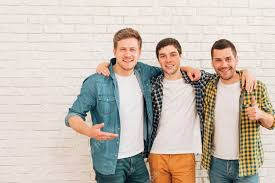

In [98]:
img = cv2.imread('/content/grp.jpg')

cv2_imshow(img)


In [99]:
face_detection_model = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt',
                                                '/content/res10_300x300_ssd_iter_140000_fp16.caffemodel')


In [100]:
def face_detection_dnn(img):
    # step-1: blob from image
    blob = cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),swapRB=True)
    # step-2: set blob as input
    face_detection_model.setInput(blob)
    # step-3: get the output
    detections = face_detection_model.forward()
    #  step-4: drawing boundng box on top of face detected
    image = img.copy()
    h,w = image.shape[:2]
    p=0
    for i in range(0,detections.shape[2]):
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            # diagonal points 3: 7
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            box = box.astype('int')
            pt1 = (box[0],box[1])
            pt2 = (box[2],box[3])
            # draw rectangle
            p+=1
            cv2.rectangle(image,pt1,pt2,(0,255,0),1)
            

           
    cv2.putText(image,"Total {} faces detected".format(str(p)),(40,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1)

    return image

In [101]:
img_detect = face_detection_dnn(img)

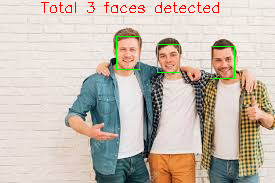

In [102]:

cv2_imshow(img_detect)